<a href="https://colab.research.google.com/github/leksangpelkey/Predictive-Analytics/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


#load dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/cars.csv')

#EDA

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.

In [ ]:
data.head()

,price,maintenance,doors,persons,trunk_size,safety,target
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [ ]:
data['price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
data['maintenance'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
data['trunk_size'].unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
data['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [ ]:
data['target'].unique()

array([0, 1, 3, 2])

#visiualization

<Figure size 1440x576 with 0 Axes>

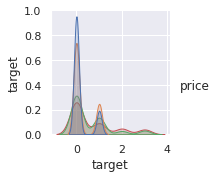

In [ ]:
plt.figure(figsize=(20,8))
sns.pairplot(data, hue='price')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   trunk_size   1728 non-null   object
 5   safety       1728 non-null   object
 6   target       1728 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [ ]:
data_categorical = data.select_dtypes(include =[object])

In [ ]:
data_categorical.head()

,price,maintenance,doors,persons,trunk_size,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
data_dummies = pd.get_dummies(data_categorical, drop_first=True)

In [ ]:
data_dummies.head()

,price_low,price_med,price_vhigh,maintenance_low,maintenance_med,maintenance_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,trunk_size_med,trunk_size_small,safety_low,safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


#Train Test Split

In [ ]:
X=data_dummies

In [ ]:
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

#Train a Logestic Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


#Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[351  22   1   0]
 [  7  95   6   0]
 [  0  12   5   4]
 [  0   6   0  10]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       374
           1       0.70      0.88      0.78       108
           2       0.42      0.24      0.30        21
           3       0.71      0.62      0.67        16

    accuracy                           0.89       519
   macro avg       0.70      0.67      0.68       519
weighted avg       0.89      0.89      0.89       519

